In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

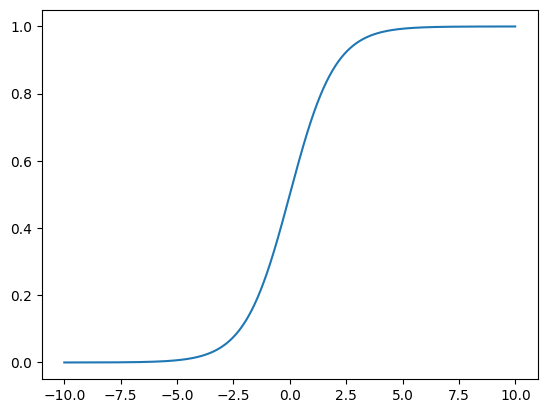

In [ ]:
X = np.arange(-10, 10, 0.01)
plt.plot(X, sigmoid(X))
plt.show()

In [ ]:
sigmoid(0)

0.5

In [ ]:
#ds_dx = sigmoid(x) * (1-sigmoid(x))

# Model avec Sigmoid

In [ ]:
def erreur(X, Y, params):

  info = {}

  M1 = np.dot(X, params['W1'])

  N1 = M1 + params['B1']

  S1 = sigmoid(N1)

  M2 = np.dot(S1, params['W2'])

  P = M2 + params['B2']

  L = np.mean((Y-P) ** 2) # MSE

  info['M1'] = M1
  info['N1'] = N1
  info['S1'] = S1
  info['M2'] = M2
  info['P'] = P

  info['X'] = X
  info['Y'] = Y

  return L, info

In [ ]:
def gradient(info, params):

  dL_dP =  -2 * (info['Y'] - info['P'])

  dP_dM2 = 1
  dL_dM2 = dL_dP * dP_dM2

  dP_dB2 = 1
  dL_dB2 = dL_dP * dP_dB2
  dL_dB2 = dL_dB2.sum()

  dM2_dW2 = info['S1'].T
  dL_dW2 = np.dot(dM2_dW2, dL_dP)

  dM2_dS1 = params['W2'].T
  dL_dS1 = np.dot(dL_dM2, dM2_dS1)

  dS1_dN1 = sigmoid(info['N1']) * (1- sigmoid(info['N1']))
  dL_dN1 = dL_dS1 * dS1_dN1

  dN1_dB1 = 1
  dN1_dM1 = 1

  dL_dB1 = (dL_dN1 * dN1_dB1).sum()
  dL_dB1 = dL_dB1.sum()
  dL_dM1 = dL_dN1 * dN1_dM1

  dM1_dW1 = info['X'].T
  dL_dW1 = np.dot(dM1_dW1, dL_dM1)


  grads = {}
  grads['W1'] = dL_dW1
  grads['B1'] = dL_dB1
  grads['W2'] = dL_dW2
  grads['B2'] = dL_dB2


  return grads



In [ ]:
def train(X, Y, epoch, learning_rate):

  # weights initialization
  np.random.seed(42)
  n_features  = X.shape[1]
  n_feat_transform = n_features
  params = {}
  params['W1'] = np.random.randn(n_features, n_feat_transform)
  params['B1'] = np.random.randn(1, n_feat_transform)
  params['W2'] = np.random.randn(n_feat_transform, 1)
  params['B2'] = np.random.randn(1, 1)

  errors = []
  for i in range(epoch):

    # forward
    loss, info = erreur(X, Y, params)
    errors.append(loss)
    print(f'Epoch {i+1} .............. loss : {loss}')

    #backward

    grads = gradient(info, params)

    # update
    for p in params:
      params[p] = params[p] - learning_rate * grads[p]

  return params, errors

# Application au Boston dataset

In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
data = data
target = target

X = data
Y = target.reshape((506, 1))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape, y_train.shape

((379, 13), (379, 1))

In [ ]:
params, errors = train(X_train, y_train, epoch=60, learning_rate=0.0001)

Epoch 1 .............. loss : 658.747187918459
Epoch 2 .............. loss : 364.03824881583705
Epoch 3 .............. loss : 204.36163978775102
Epoch 4 .............. loss : 107.81590012640753
Epoch 5 .............. loss : 79.82851947423356
Epoch 6 .............. loss : 69.1923806790014
Epoch 7 .............. loss : 61.51000932784534
Epoch 8 .............. loss : 55.87126460945957
Epoch 9 .............. loss : 51.6108991888034
Epoch 10 .............. loss : 48.18702007396802
Epoch 11 .............. loss : 45.279434222606184
Epoch 12 .............. loss : 42.7098470294775
Epoch 13 .............. loss : 40.38472696704206
Epoch 14 .............. loss : 38.25904125179606
Epoch 15 .............. loss : 36.312561000344154
Epoch 16 .............. loss : 34.53576444191028
Epoch 17 .............. loss : 32.92242489198569
Epoch 18 .............. loss : 31.46630112837073
Epoch 19 .............. loss : 30.159695404962292
Epoch 20 .............. loss : 28.99257512141943
Epoch 21 .............. los

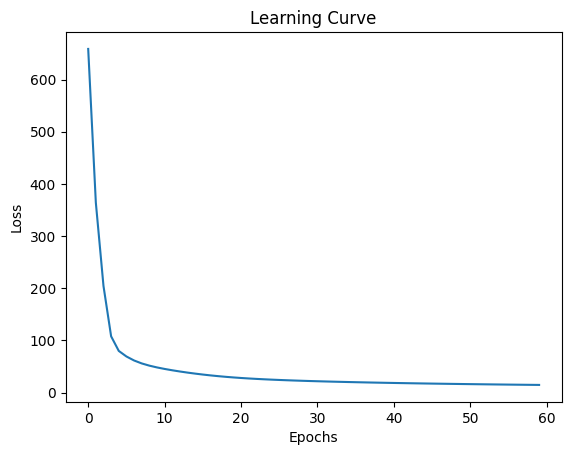

In [ ]:
import matplotlib.pyplot as plt
plt.plot(list(range(60)), errors)
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.show()

# Evaluation du modèle

In [ ]:
def predict(X, params):

  M1 = np.dot(X, params['W1'])

  N1 = M1 + params['B1']

  S1 = sigmoid(N1)

  M2 = np.dot(S1, params['W2'])

  P = M2 + params['B2']

  return P

In [ ]:
def mse(y, pred): # mean squared error
  return np.mean( (y-pred)** 2)

def rmse(y, pred):
  return np.sqrt(np.mean( (y-pred)** 2))

def mae(y, pred):
  return np.mean(np.abs(y - pred))

In [ ]:
preds = predict(X_test, params)
score_rmse = rmse(y_test, preds)
score_mae = mae(y_test, preds)
print("rmse : ", score_rmse)
print("mae : ", score_mae)

rmse :  5.133454691179821
mae :  3.351871573131282
